In [98]:
import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error

In [2]:
lags = [1,2,3,4,5,6,7]

ipca = models.predict_ipca(lags)
cambio = models.predict_cambio(lags)
selic = models.predict_selic(lags)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False

In [31]:
for i in range(1,8):
    ipca[i]['square_err'] = (ipca[i]['indice'] - ipca[i]['prediction']).apply(lambda x: x ** 2)
    cambio[i]['square_err'] = (cambio[i]['cambio'] - cambio[i]['prediction']).apply(lambda x: x ** 2)
    selic[i]['square_err'] = (selic[i]['selic'] - selic[i]['prediction']).apply(lambda x: x ** 2)

In [43]:
for i in range(1,8):
    ipca[i]['res'] = ipca[i]['prediction'] - ipca[i]['indice']
    cambio[i]['res'] = cambio[i]['prediction'] - cambio[i]['cambio']
    selic[i]['res'] = selic[i]['prediction'] - selic[i]['selic']

#### IPCA

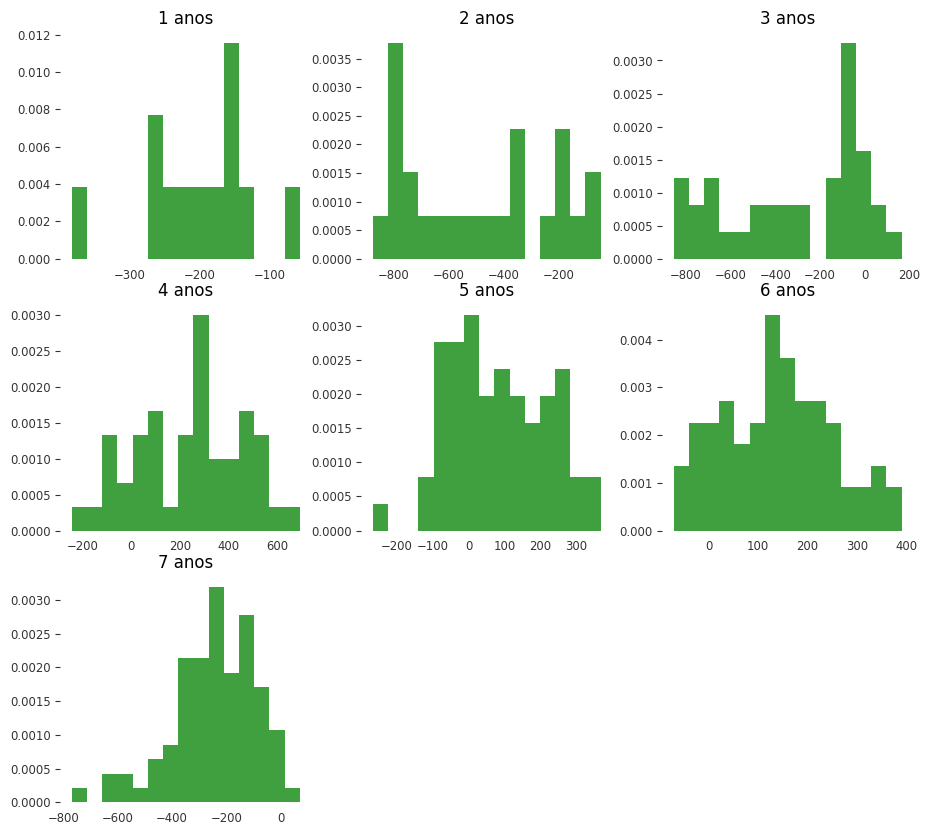

In [55]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    _ = plt.hist(ipca[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

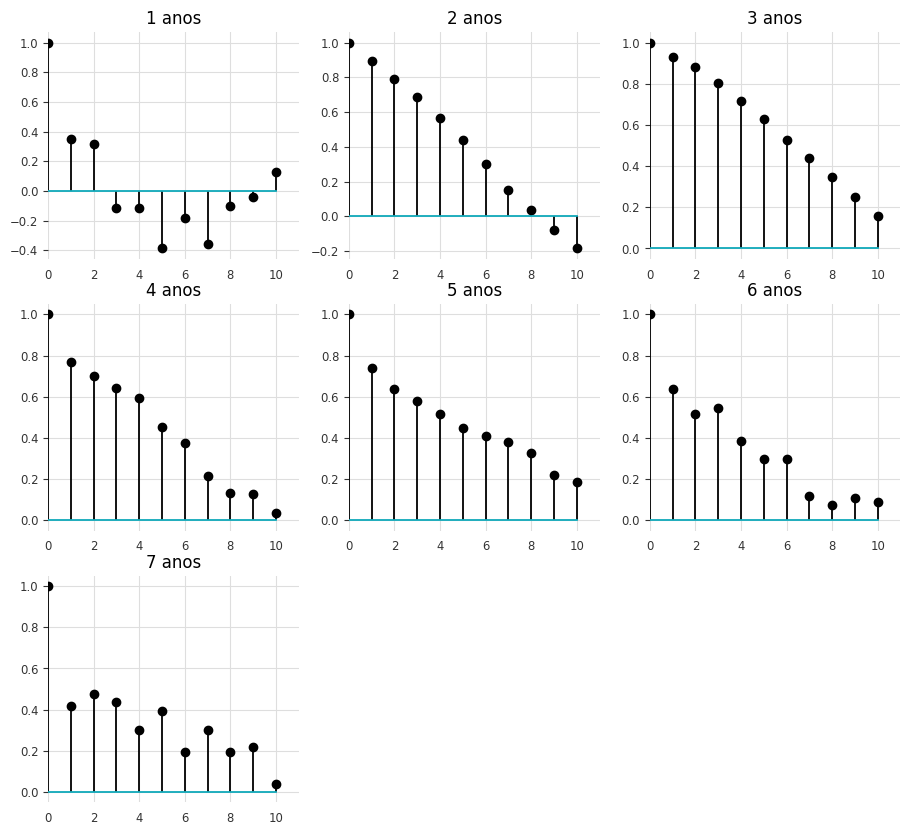

In [93]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    autocorr = acf(ipca[i]['res'].dropna(),nlags = 10)
    lags = range(0,11)
    plt.stem(lags,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

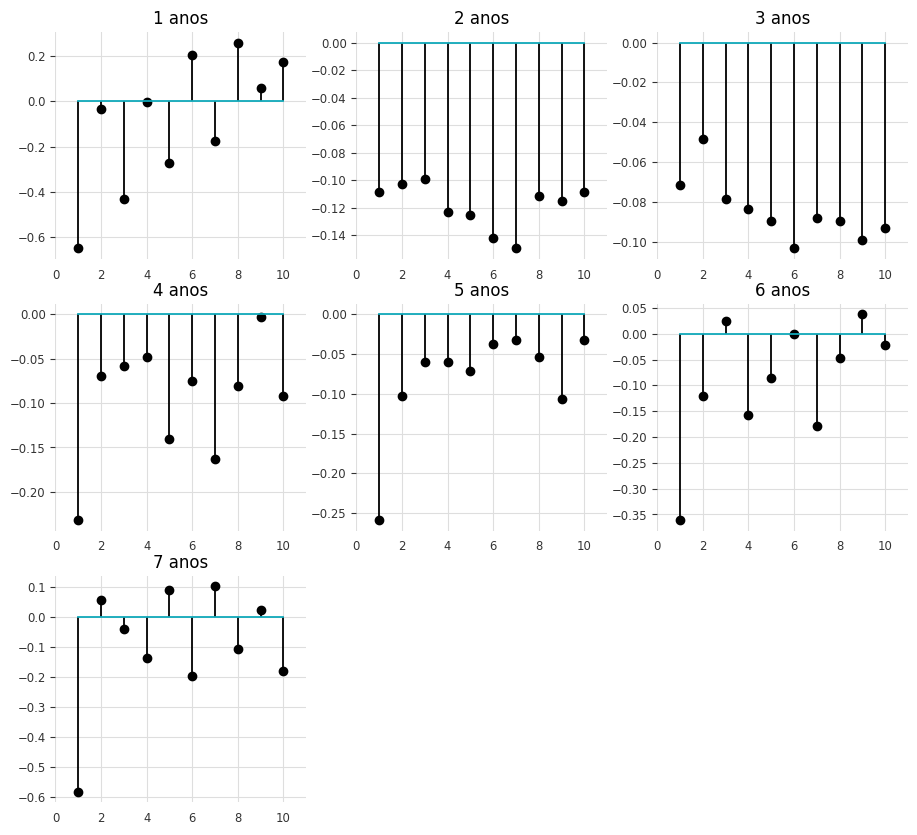

In [90]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(ipca[i]['res'].dropna(),nlags = 10))
    lags = range(1,11)
    plt.stem(lags,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

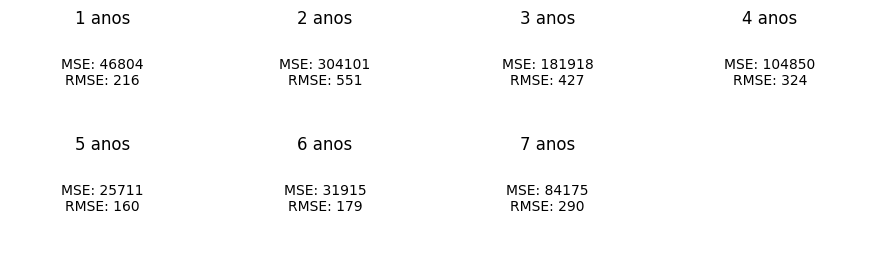

In [111]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
for i in range(1,8):
    data = ipca[i].dropna()
    mse = round(mean_squared_error(data['indice'],data['prediction']))
    rmse = round(mean_squared_error(data['indice'],data['prediction'],squared = False))
    plt.subplot(2,4,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()

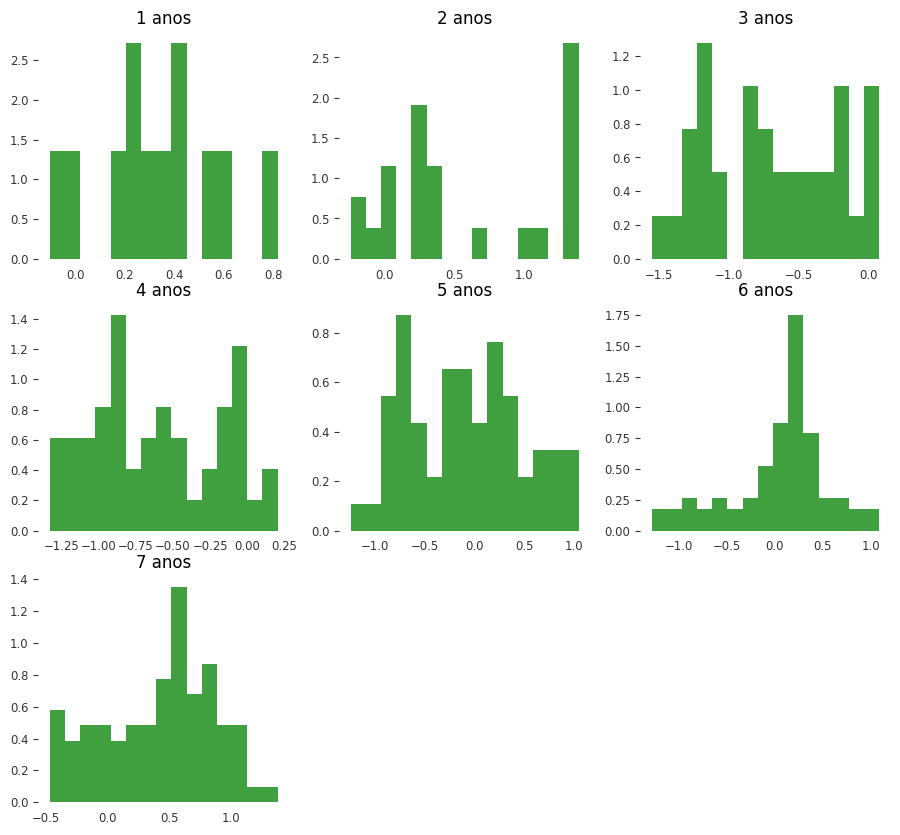

In [52]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    n, bins, patches = plt.hist(cambio[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

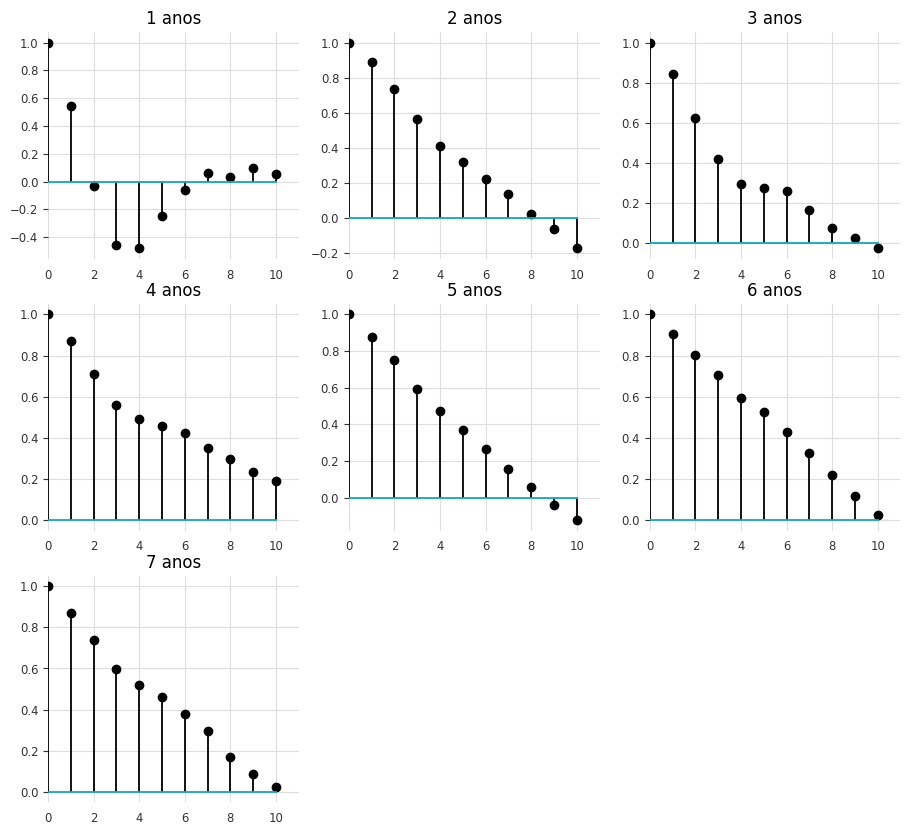

In [94]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    autocorr = acf(cambio[i]['res'].dropna(),nlags = 10)
    lags = range(0,11)
    plt.stem(lags,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

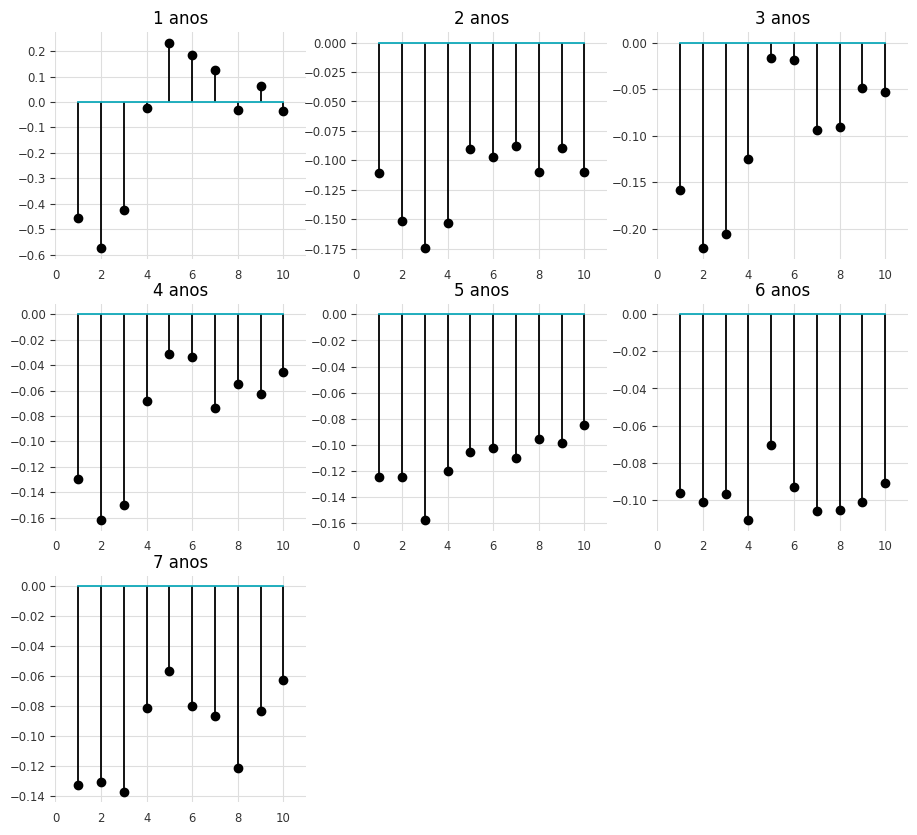

In [91]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(cambio[i]['res'].dropna(),nlags = 10))
    lags = range(1,11)
    plt.stem(lags,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

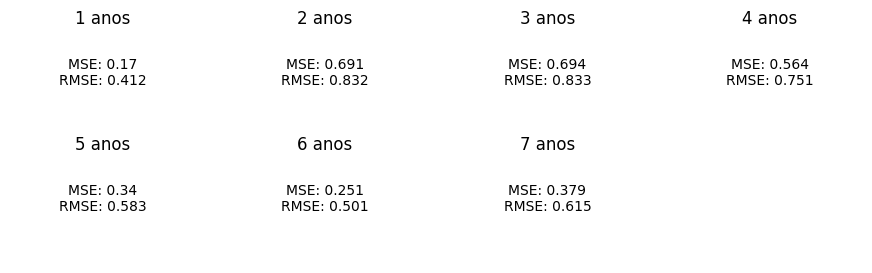

In [108]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
for i in range(1,8):
    data = cambio[i].dropna()
    mse = round(mean_squared_error(data['cambio'],data['prediction']),3)
    rmse = round(mean_squared_error(data['cambio'],data['prediction'],squared = False),3)
    plt.subplot(2,4,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()

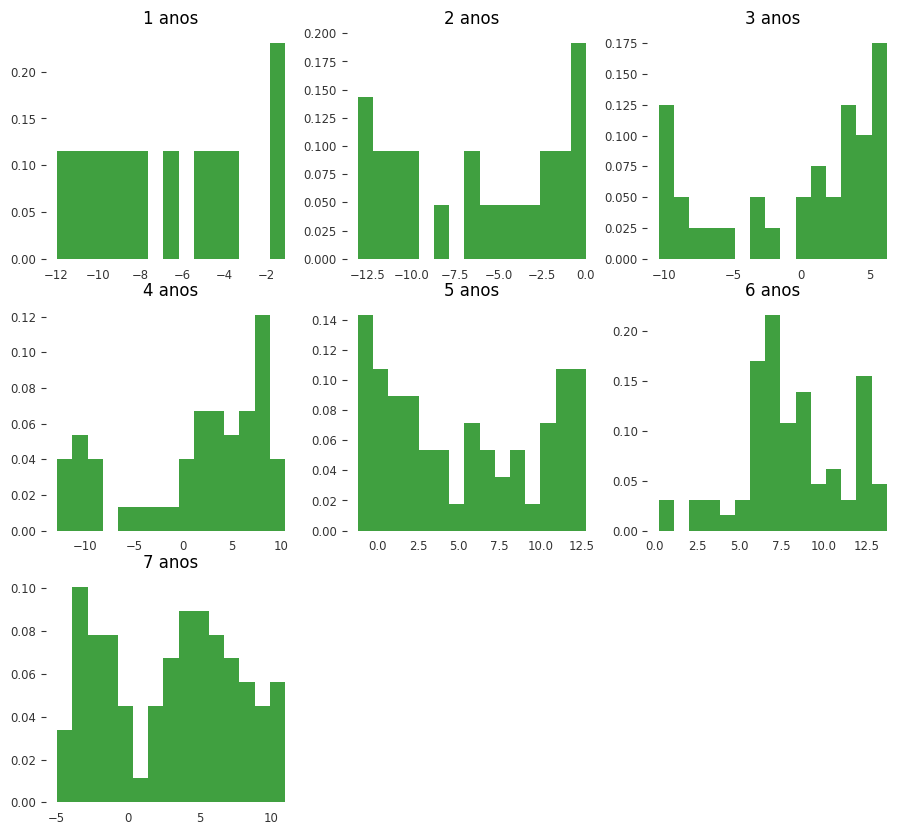

In [53]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    n, bins, patches = plt.hist(selic[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

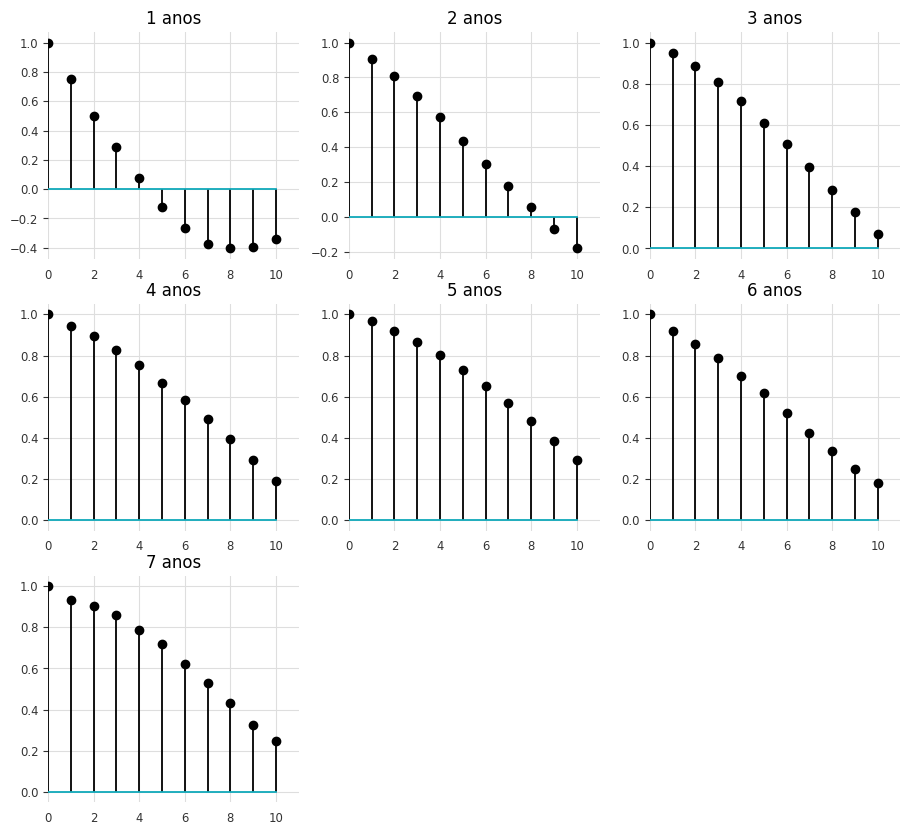

In [95]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    autocorr = acf(selic[i]['res'].dropna(),nlags = 10)
    lags = range(0,11)
    plt.stem(lags,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

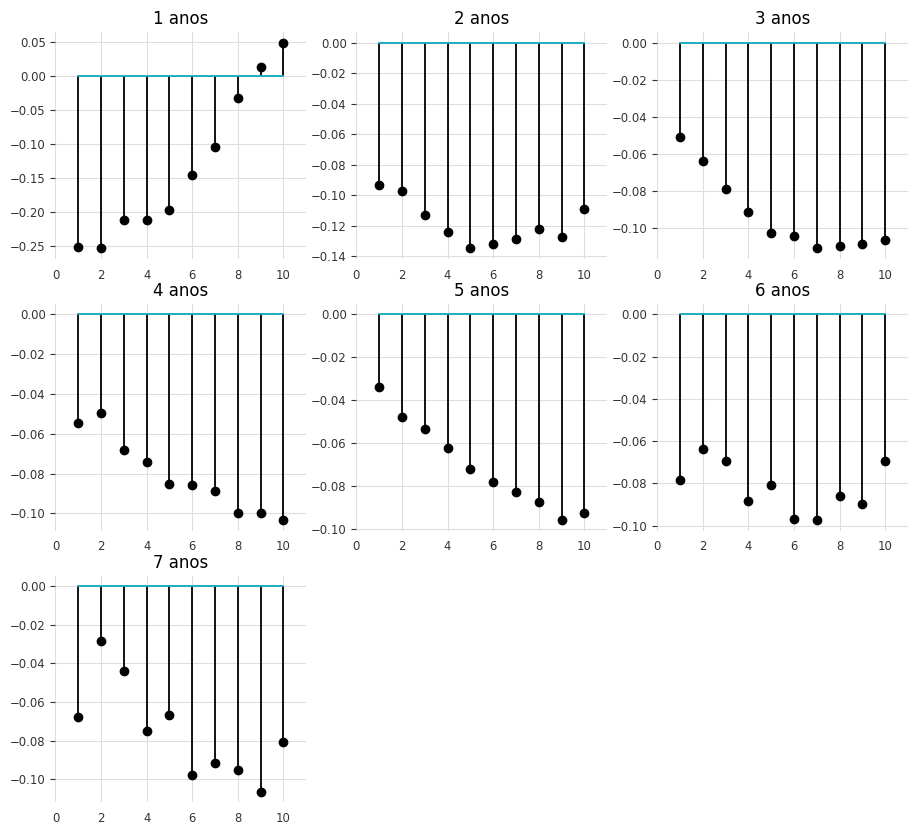

In [92]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(selic[i]['res'].dropna(),nlags = 10))
    lags = range(1,11)
    plt.stem(lags,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

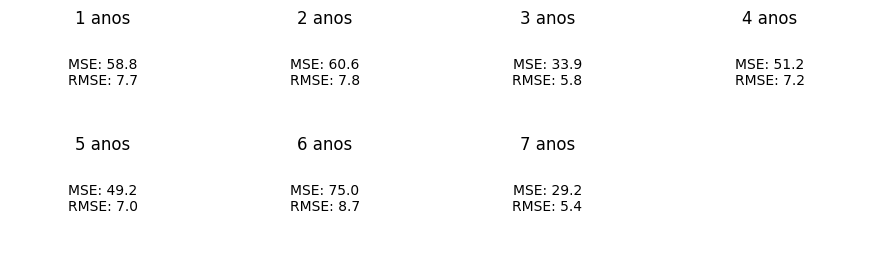

In [110]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
for i in range(1,8):
    data = selic[i].dropna()
    mse = round(mean_squared_error(data['selic'],data['prediction']),1)
    rmse = round(mean_squared_error(data['selic'],data['prediction'],squared = False),1)
    plt.subplot(2,4,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()